## 패키지 불러오기

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
import matplotlib.pylab as plt
from datetime import datetime
import seaborn as sns

In [333]:
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10,4)

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [334]:
# 추후 그래프의 x축의 주차별 표시 위한 것
week_17 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
week_from_3week = ['3','4','5','6','7','8','9','10','11','12','13','14','15', '16', '17']

## 19년과 20년의 송장 건수의 대략적 비교


In [335]:
logistic_data = pd.read_excel('./2020빅콘테스트 문제데이터(혁신아이디어분야) (2)./05_물류데이터(CJ올리브네트웍스)./2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')
logistic_data

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [336]:
#물류 데이터를 19년 2월부터 5월, 20년도 2월부터 5월까지의 데이터로 나누는 작업

logistic_1902=logistic_data[(logistic_data['DL_YMD']>=190201)&(logistic_data['DL_YMD']<=190229)]
logistic_1903=logistic_data[(logistic_data['DL_YMD']>=190301)&(logistic_data['DL_YMD']<=190331)]
logistic_1904=logistic_data[(logistic_data['DL_YMD']>=190401)&(logistic_data['DL_YMD']<=190431)]
logistic_1905=logistic_data[(logistic_data['DL_YMD']>=190501)&(logistic_data['DL_YMD']<=190531)]

logistic_2002=logistic_data[(logistic_data['DL_YMD']>=200201)&(logistic_data['DL_YMD']<=200229)]
logistic_2002=logistic_data[(logistic_data['DL_YMD']>=200301)&(logistic_data['DL_YMD']<=200331)]
logistic_2002=logistic_data[(logistic_data['DL_YMD']>=200401)&(logistic_data['DL_YMD']<=190431)]
logistic_2002=logistic_data[(logistic_data['DL_YMD']>=200501)&(logistic_data['DL_YMD']<=190531)]

In [337]:
#날짜별 송장건수의 합을 구함

logistic_data_by_month=logistic_data.groupby(['DL_YMD'], as_index=False).sum().drop(['DL_GD_LCLS_CD','CTPV_CD','CTGG_CD','HDNG_CD'], axis=1)
logistic_data_by_month

,DL_YMD,INVC_CONT
0,190201,11575
1,190202,1646
2,190203,369
3,190204,123
4,190205,69
...,...,...
236,200527,106021
237,200528,100891
238,200529,91972
239,200530,12289


In [338]:
#월별 송장건수의 합을 구함

logistic_data_2019=logistic_data[(logistic_data['DL_YMD']>=190201)&(logistic_data['DL_YMD']<=190531)].drop(['DL_GD_LCLS_NM','DL_GD_LCLS_CD','CTPV_NM','CTPV_CD','CTGG_NM','CTGG_CD','HDNG_NM','HDNG_CD'], axis=1)
conditions=[(logistic_data_2019['DL_YMD']>=190201)&(logistic_data_2019['DL_YMD']<=190231),
            (logistic_data_2019['DL_YMD']>=190301)&(logistic_data_2019['DL_YMD']<=190331),
           (logistic_data_2019['DL_YMD']>=190401)&(logistic_data_2019['DL_YMD']<=190431),
           (logistic_data_2019['DL_YMD']>=190501)&(logistic_data_2019['DL_YMD']<=190531)]
choices=['19년_2월', '19년_3월', '19년_4월', '19년_5월']
logistic_data_2019['날짜']=np.select(conditions, choices)

19년도의 월별 송장 건수

In [339]:
logistic_data_2019_edit=logistic_data_2019.drop(['DL_YMD'],axis=1)
logistic_data_2019_pivot=logistic_data_2019_edit.pivot_table(index='날짜',
                                                             values='INVC_CONT',
                                                             aggfunc=np.sum)
logistic_data_2019_pivot.rename(columns={'INVC_CONT':'월별 송장건수'},inplace=True)
logistic_data_2019_pivot

,월별 송장건수
날짜,
19년_2월,1627147
19년_3월,1977310
19년_4월,2010280
19년_5월,2048914


20년도의 월별 송장 건수

In [340]:
logistic_data_2020=logistic_data[(logistic_data['DL_YMD']>=200201)&(logistic_data['DL_YMD']<=200531)].drop(['DL_GD_LCLS_NM','DL_GD_LCLS_CD','CTPV_NM','CTPV_CD','CTGG_NM','CTGG_CD','HDNG_NM','HDNG_CD'], axis=1)
conditions=[(logistic_data_2020['DL_YMD']>=200201)&(logistic_data_2020['DL_YMD']<=200231),
            (logistic_data_2020['DL_YMD']>=200301)&(logistic_data_2020['DL_YMD']<=200331),
           (logistic_data_2020['DL_YMD']>=200401)&(logistic_data_2020['DL_YMD']<=200431),
           (logistic_data_2020['DL_YMD']>=200501)&(logistic_data_2020['DL_YMD']<=200531)]
choices=['20년_2월', '20년_3월', '20년_4월', '20년_5월']
logistic_data_2020['날짜']=np.select(conditions, choices)

In [341]:
logistic_data_2020_edit=logistic_data_2020.drop(['DL_YMD'],axis=1)
logistic_data_2020_pivot=logistic_data_2020_edit.pivot_table(index='날짜',
                                                             values='INVC_CONT',
                                                             aggfunc=np.sum)
logistic_data_2020_pivot.rename(columns={'INVC_CONT':'월별 송장건수'},inplace=True)
logistic_data_2020_pivot

,월별 송장건수
날짜,
20년_2월,2348916
20년_3월,2764249
20년_4월,2438587
20년_5월,2610071


In [342]:
logistic_data_2020=logistic_data[(logistic_data['DL_YMD']>=200201)&(logistic_data['DL_YMD']<=200531)].drop(['DL_GD_LCLS_NM','DL_GD_LCLS_CD','CTPV_NM','CTPV_CD','CTGG_NM','CTGG_CD','HDNG_NM','HDNG_CD'], axis=1)
conditions=[(logistic_data_2020['DL_YMD']>=200201)&(logistic_data_2020['DL_YMD']<=200231),
            (logistic_data_2020['DL_YMD']>=200301)&(logistic_data_2020['DL_YMD']<=200331),
           (logistic_data_2020['DL_YMD']>=200401)&(logistic_data_2020['DL_YMD']<=200431),
           (logistic_data_2020['DL_YMD']>=200501)&(logistic_data_2020['DL_YMD']<=200531)]
choices=['20년_2월', '20년_3월', '20년_4월', '20년_5월']
logistic_data_2020['날짜']=np.select(conditions, choices)

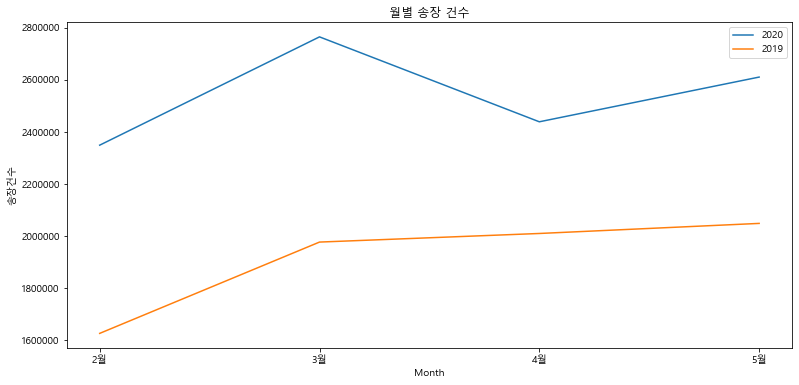

In [343]:
plt.figure(figsize=(13, 6))
ax=plt.plot(['2월','3월','4월','5월'],logistic_data_2020_pivot['월별 송장건수'], label='2020')
ax=plt.plot(['2월','3월','4월','5월'],logistic_data_2019_pivot['월별 송장건수'], label='2019')
ax=plt.xlabel('Month')
ax=plt.ylabel('송장건수')
ax=plt.title('월별 송장 건수')
plt.legend()
plt.show()

### 기존의 택배 확산세 고려한 분석
국가물류통합정보센터에 따르면, 택배산업은 2012년~2019년 평균 10% 성장하고 있다. 이를 고려해 코로나가 없다고 가정한 2020년의 예측 송장 건수와 실제 송장 건수를 비교해보자

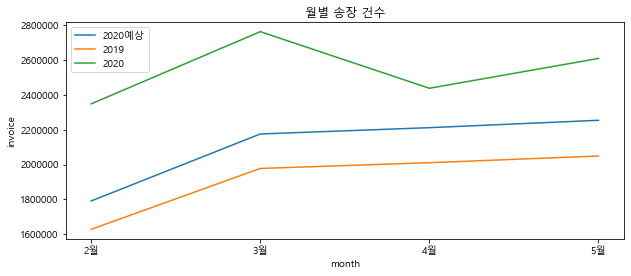

In [344]:
logistic_data = pd.read_excel('./2020빅콘테스트 문제데이터(혁신아이디어분야) (2)./05_물류데이터(CJ올리브네트웍스)./2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')
Logistics=pd.read_excel('./01_parcelServiceLogistics.xlsx')
# 국가물류통합정보센터-물류통계-생활물류통계-택배 물동량 추이 데이터

logistic_data=logistic_data[['DL_YMD','INVC_CONT']]
# 2020 빅콘테스트_CJ올리브네트웍스_제공DB 데이터의 일자별 송장건수 데이터 추출

data = logistic_data.set_index("DL_YMD", append=False)

data1 = data.groupby(by=['DL_YMD']).sum()

data1=data1.reset_index()
data1["DL_YMD"]=pd.to_datetime(data1["DL_YMD"],format="%y%m%d")

dataa=data1.set_index('DL_YMD')

data2 = dataa.resample('MS').sum()
# 추출한 일자별 송장건수 데이터를 월별 합으로 묶음

growth_rate = Logistics['Unnamed: 8'][4:12].mean()
# 택배 물동량 추이 데이터의 12년도부터 19년도까지의 YoY 성장률의 평균값

data_19 = data2[0:4]

exp_20 = data_19*(1+growth_rate)
# 코로나 상황을 무시한 2020년 예상 택배 물동량

data_20 = data2[12:17]

plt.plot(['2월','3월','4월', '5월'], exp_20, label='2020예상')
plt.plot(['2월','3월','4월', '5월'], data_19, label='2019')
plt.plot(['2월','3월','4월', '5월'], data_20, label='2020')
plt.xlabel('month')
plt.ylabel('invoice')
plt.title('월별 송장 건수')

plt.legend()
plt.show()

기존의 택배 확산세를 고려한 예측값보다 훨씬 더 많은 택배가 발생했다.  
이른 코로나 때문으로 보인다.  
  
그렇다면, 코로나 확산세에 따른 택배량 변화를 분석해보자

# 1. 코로나 확산세와 송장 건수 상관도 분석
    - 보건복지부_코로나19 시·도발생_현황 (공공데이터)
    - 물류데이터(CJ올리브네트웍스)
코로나 확산세에 따른 송장 건수의 변화 예측 모델 만들기

f(코로나 확산세)=송장 건수


## 2020년 2월~5월의 서울시 코로나 일일 확진자 데이터 분석  

In [345]:
seoul = pd.read_csv('./서울시 코로나19 확진자 현황.csv', sep=',',thousands=',',  header=None)
seoul

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
1,1,1.24.,#2,한국인,남(?64),강서구,중국 우한시,해외 접촉,국립중앙의료원,퇴원,이동경로 공개기간 경과,2020-08-19 14:49,2020-08-19 14:49,Y
2,2,1.30.,#5,한국인,남(?87),중랑구,중국 우한시,해외 접촉,서울의료원,퇴원,이동경로 공개기간 경과,2020-08-19 14:49,2020-08-19 14:49,Y
3,3,1.30.,#6,한국인,남(?64),종로구,NaN,#3 접촉,서울대학교병원,퇴원,이동경로 공개기간 경과,2020-08-19 14:49,2020-08-19 14:49,Y
4,4,1.30.,#7,한국인,남(?91),마포구,중국 우한시,해외 접촉,서울의료원,퇴원,이동경로 공개기간 경과,2020-08-19 14:49,2020-08-19 14:49,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,2356,8.18.,15955,한국인,남(`74),기타,NaN,확인 중,배정중,NaN,확인 중,2020-08-19 14:49,2020-08-19 14:49,Y
2357,2357,8.18.,16023,한국인,여(`54),기타,NaN,확인 중,배정중,NaN,확인 중,2020-08-19 14:49,2020-08-19 14:49,Y
2358,2358,8.18.,15958,한국인,남(`91),기타,NaN,확인 중,배정중,NaN,확인 중,2020-08-19 14:49,2020-08-19 14:49,Y
2359,2359,8.18.,16053,한국인,여(`00),기타,NaN,확인 중,배정중,NaN,확인 중,2020-08-19 14:49,2020-08-19 14:49,Y


In [346]:
day_num_feb = pd.Series(range(29))
for i in range(1,30):
    k = "a=seoul[seoul[1]=='2.%d.']"%i # 데이터에서 2월 x일 데이터프레임 뽑기
    exec(k)
    number = len(a) # 데이터프레임의 길이 = 2월 x일 확진자 수
    day_num_feb[i-1]=number # x일의 확진자 수를 day_num_feb에 넣기
day_num_feb=list(day_num_feb)

day_num_mar = pd.Series(range(31))
for i in range(1,32):
    k = "a=seoul[seoul[1]=='3.%d.']"%i
    exec(k)
    number = len(a)
    day_num_mar[i-1]=number
day_num_mar=list(day_num_mar)

day_num_apr = pd.Series(range(30))
for i in range(1,31):
    k = "a=seoul[seoul[1]=='4.%d.']"%i
    exec(k)
    number = len(a)
    day_num_apr[i-1]=number
day_num_apr=list(day_num_apr)

day_num_may = pd.Series(range(31))
for i in range(1,32):
    k = "a=seoul[seoul[1]=='5.%d.']"%i
    exec(k)
    number = len(a)
    day_num_may[i-1]=number
day_num_may=list(day_num_may)

서울시 코로나 일일 확진자를 리스트로 만든 것

In [347]:
day_num_seoul_20=day_num_feb+day_num_mar+day_num_apr+day_num_may

## 서울시 일일 코로나 확진자 추이(2월~5월)

Text(0.5, 1.0, 'seoul_confirmed')

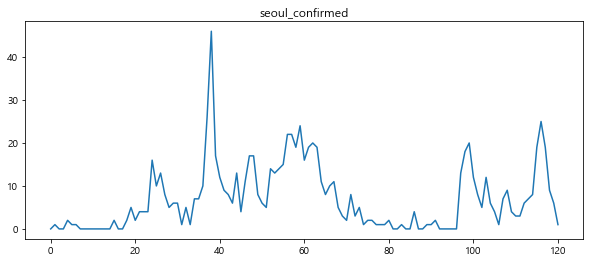

In [348]:
plt.plot(day_num_seoul_20)
plt.title('seoul_confirmed')

# 서울시 송장 건수 데이터 분석

In [349]:
logistic_data = pd.read_excel('./2020빅콘테스트 문제데이터(혁신아이디어분야) (2)./05_물류데이터(CJ올리브네트웍스)./2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')
logistic_data_seoul=logistic_data[(logistic_data['CTPV_NM']=='서울특별시')&(logistic_data['DL_YMD']>=200201)]
logistic_data_seoul

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
76893,200201,도서/음반,12,서울특별시,11,노원구,35,월계1동,560,24
76895,200201,가구/인테리어,10,서울특별시,11,노원구,35,상계3.4동,665,4
76897,200201,디지털/가전,13,서울특별시,11,노원구,35,상계6.7동,695,23
76902,200201,도서/음반,12,서울특별시,11,중구,14,신당제5동,650,16
76905,200201,식품,17,서울특별시,11,노원구,35,상계5동,670,17
...,...,...,...,...,...,...,...,...,...,...
156563,200531,패션잡화,20,서울특별시,11,중구,14,명동,550,9
156564,200531,화장품/미용,21,서울특별시,11,노원구,35,상계1동,630,39
156565,200531,출산/육아,18,서울특별시,11,노원구,35,상계10동,720,1
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21


In [350]:
#서울 20년도 송장건수 데이터를 일별로 더해 데이터 프레임으로 생성

logistic_data_seoul=logistic_data_seoul.groupby(['DL_YMD'], as_index=False).sum().drop(['DL_YMD', 'DL_GD_LCLS_CD', 'CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1)

date_range=pd.date_range('2020-02-01', periods=121)
logistic_data_seoul.set_index(date_range, inplace=True)
logistic_data_seoul.rename(columns={'INVC_CONT': '서울 일일 송장건수'}, inplace=True)
logistic_data_seoul

,서울 일일 송장건수
2020-02-01,8969
2020-02-02,8121
2020-02-03,95777
2020-02-04,61582
2020-02-05,55682
...,...
2020-05-27,61737
2020-05-28,59298
2020-05-29,53479
2020-05-30,7094


### 서울시 일일 송장 건수

일일 송장 건수를 리스트형태로 바꾼 것

In [351]:
day_inv_seoul_20 = list(logistic_data_seoul['서울 일일 송장건수'].values)

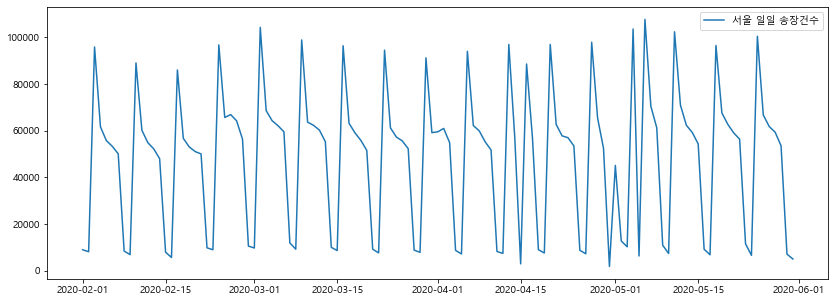

In [352]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=logistic_data_seoul)

#### 주말에는 택배 배송량이 급감하므로 일일 배송량이 아닌 주간 배송량으로 교체  
2월 1,2일은 주말이여서 편의상 2월 3일부터 데이터 분석 시작  
5월 31일은 일요일이여서 교체할 필요x

In [353]:
day_inv_con_seoul_20 = day_inv_seoul_20[2:]

In [354]:
week_inv_seoul_20=[]
for i in range(0,int(len(day_inv_con_seoul_20)),7):
    week_inv_seoul_20.append(sum(day_inv_con_seoul_20[i:i+7]))
print('2020년 2월~5월 서울시 주간 송장 건수\n', week_inv_seoul_20)

2020년 2월~5월 서울시 주간 송장 건수
 [331653, 317639, 315361, 369923, 379571, 358675, 342580, 337261, 341308, 338457, 318884, 343574, 285466, 367233, 364869, 360065, 353648]


서울시 주간 송장 건수

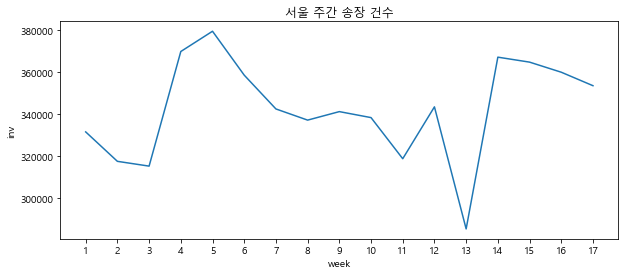

In [355]:
plt.plot(week_17, week_inv_seoul_20)
plt.title('서울 주간 송장 건수')
plt.xlabel('week')
plt.ylabel('inv')
plt.show()

#### 서울시 일별 코로나 확진자 수 -> 주간 확진자 수로 교체  
마찬가지로 2월 3일부터 시작

In [356]:
day_num_con_seoul_20 = day_num_seoul_20[2:]

week_num_seoul_20=[]
for i in range(0,int(len(day_num_seoul_20))-7,7):
    week_num_seoul_20.append(sum(day_num_con_seoul_20[i:i+7]))
print('2020년 2월~5월 서울시 주간 확진자 수\n', week_num_seoul_20)

2020년 2월~5월 서울시 주간 확진자 수
 [4, 2, 17, 62, 37, 124, 76, 105, 128, 47, 15, 4, 8, 51, 48, 39, 87]


#### 서울시 주간 확진자 수

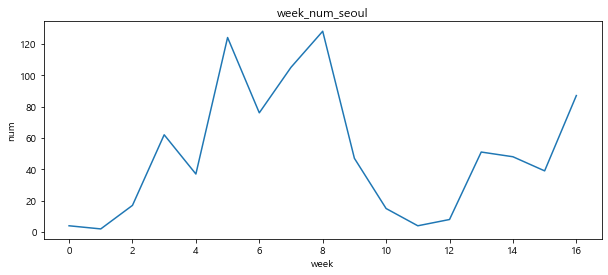

In [357]:
plt.plot(week_num_seoul_20)
plt.title('week_num_seoul')
plt.xlabel('week')
plt.ylabel('num')
plt.show()

## 요일에 따른 송장 건수 분석

In [358]:
day_inv_con_seoul_weekday = []
day_inv_con_seoul_mon = []
day_inv_con_seoul_tue = []
day_inv_con_seoul_wed = []
day_inv_con_seoul_thu = []
day_inv_con_seoul_fri = []
day_inv_con_seoul_sat = []
day_inv_con_seoul_sun = []
for i in range(0,len(day_inv_con_seoul_20),7):
    day_inv_con_seoul_weekday.append(day_inv_con_seoul_20[i])
    day_inv_con_seoul_weekday.append(day_inv_con_seoul_20[i+1])
    day_inv_con_seoul_weekday.append(day_inv_con_seoul_20[i+2])
    day_inv_con_seoul_weekday.append(day_inv_con_seoul_20[i+3])
    day_inv_con_seoul_weekday.append(day_inv_con_seoul_20[i+4])
    
    day_inv_con_seoul_mon.append(day_inv_con_seoul_20[i])
    day_inv_con_seoul_tue.append(day_inv_con_seoul_20[i+1])
    day_inv_con_seoul_wed.append(day_inv_con_seoul_20[i+2])
    day_inv_con_seoul_thu.append(day_inv_con_seoul_20[i+3])
    day_inv_con_seoul_fri.append(day_inv_con_seoul_20[i+4])
    
#plt.plot(day_inv_con_seoul_weekday)
#plt.title('서울 평일 송장 건수')
avg_inv_weekday = sum(day_inv_con_seoul_weekday)/len(day_inv_con_seoul_weekday)

day_inv_con_seoul_weekend = []
for i in range(0,len(day_inv_con_seoul_20),7):
    day_inv_con_seoul_weekend.append(day_inv_con_seoul_20[i+5])
    day_inv_con_seoul_weekend.append(day_inv_con_seoul_20[i+6])
    
    day_inv_con_seoul_sat.append(day_inv_con_seoul_20[i+5])
    day_inv_con_seoul_sun.append(day_inv_con_seoul_20[i+6])
avg_inv_weekend =  sum(day_inv_con_seoul_weekend)/len(day_inv_con_seoul_weekend)
print()

print('월요일 평균 송장 : ', sum(day_inv_con_seoul_mon)/len(day_inv_con_seoul_mon))
print('화요일 평균 송장 : ', sum(day_inv_con_seoul_tue)/len(day_inv_con_seoul_tue))
print('수요일 평균 송장 : ', sum(day_inv_con_seoul_wed)/len(day_inv_con_seoul_wed))
print('목요일 평균 송장 : ', sum(day_inv_con_seoul_thu)/len(day_inv_con_seoul_thu))
print('금요일 평균 송장 : ', sum(day_inv_con_seoul_fri)/len(day_inv_con_seoul_fri))
print('토요일 평균 송장 : ', sum(day_inv_con_seoul_sat)/len(day_inv_con_seoul_sat))
print('일요일 평균 송장 : ', sum(day_inv_con_seoul_sun)/len(day_inv_con_seoul_sun))
print()
print('평일 평균 송장 : ', avg_inv_weekday)
print('주말 평균 송장 : ', avg_inv_weekend)



월요일 평균 송장 :  96476.94117647059
화요일 평균 송장 :  59899.05882352941
수요일 평균 송장 :  58811.35294117647
목요일 평균 송장 :  56792.705882352944
금요일 평균 송장 :  53510.117647058825
토요일 평균 송장 :  9570.176470588236
일요일 평균 송장 :  7655.35294117647

평일 평균 송장 :  65098.035294117646
주말 평균 송장 :  8612.764705882353


#### 공휴일, 주말물량은 평일의 13%  
#### 월요일 물량은 화수목금의 170%  

주간 배송량을 100으로 둔다면,
#### 월28 화17 수17 목17 금17 토2 일2 = 100 이라고 볼 수 있다.


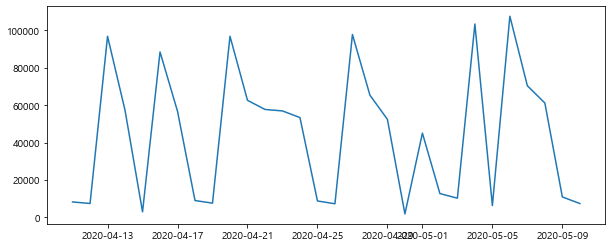

In [359]:
plt.plot(logistic_data_seoul[70:100])

위의 그래프를 보면 4/15 선거, 5/5 어린이날에 물량이 주말 수준으로 감소하는 것을 알 수 있다.  
#### 공휴일에는 주말수준인 평일의 13%만 배송한다는 것이다.  
#### 또한 다음날에는 기존 화수목금 수준이 아닌, 월요일에 준하는 수준으로 증가한다.  
4/30일도 부처님오신날로서 물량이 감소했지만 다음날이 5/1(근로자의날)이여서 일부는 쉰 것으로 보여서 이부분은 고려하지 않았다.
  
따라서 화요일에 공휴일이 있다고 가정하면  
월28 화2 수28 목17 금17 토2 일2 = 96  이렇게 요일별 배송량이 변하므로  
#### 평소보다 주간 배송량 4% 감소, 반사효과로 다음 주의 배송량이 4% 증가함을 유추할 수 있다.
(공휴일이 있으면 택배 배송은 쉬지만, 사람들이 물량을 덜 시키지는 않으므로)  
-> 공휴일의 발생으로 인한 주간 배송량 차이를 없애려면 보정 필요하다.  
코로나로 인한 택배물량의 변동을 알기 위해선 다른 변인들을 통제해야 하기 때문이다.

#### 2020년의 공휴일  
   
   
4/15 선거(11주차), 4/30 부처님오신날(13주차), 5/5어린이날(14주차) 
   
이 주차들은 코로나가 아닌 공휴일의 영향을 받아 배송량이 4%씩 감소한 주이므로,  
배송량을 4%씩 인위적으로 늘리고,  
각 주의 다음 주는 배송량을 4%씩 줄이는 보정작업 실시

엄밀히 말하면 4%가 감소한 것을 원래 수준으로 맞추기 위해선 4%를 늘리는 것이 아니라, 100/96*100-100=4.16% 를 늘려야 하고,   
마찬가지로 4%가 증가한 것을 원래 수준으로 맞추기 위해선 ㅣ100/104x100-100ㅣ= 3.85%를 줄여야 하지만,  
편의상 4%로 통일하였다.

In [360]:
week_inv_seoul_20_adj = []

for i in range(17):
    if i == 10:
        week_inv_seoul_20_adj.append(int(week_inv_seoul_20[i]*1.04))
    elif i == 11:
        week_inv_seoul_20_adj.append(int(week_inv_seoul_20[i]*0.96))
    elif i == 12:
        week_inv_seoul_20_adj.append(int(week_inv_seoul_20[i]*1.04))
    # 14주차(i==13)는 13주차 공휴일에 의한 영향이 14주차 어린이날에 의한 영향으로 상쇄
    elif i == 14:
        week_inv_seoul_20_adj.append(int(week_inv_seoul_20[i]*0.96))
    else:
        week_inv_seoul_20_adj.append(week_inv_seoul_20[i])

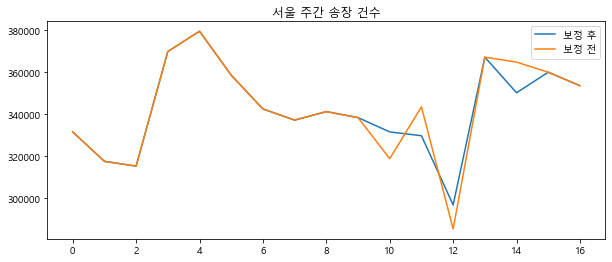

In [361]:
plt.plot(week_inv_seoul_20_adj, label='보정 후')
plt.plot(week_inv_seoul_20, label = '보정 전')
plt.title('서울 주간 송장 건수')
plt.legend()
plt.show()


### 19년도도 공휴일 보정 실시  
19년도는 2월 29일이 없어 하루가 적기 때문에 2/2로 시작점을 하루 앞당겼고,  
2/2이 토요일이므로 한 주의 주기가 토~금 이다 

2019년의 공휴일  
  
1주차 설날(월화수 공휴일) - 이는 나중에 1,2주차는 통계에서 제외할 것이므로 계산에서 제외. 근거는 언급할 것이다.

4주차[ 2/23(토)~3/1(금) ] 삼일절 - 한 주의 마지막에 공휴일이 있으므로 다음날 증가하는 배송량의 영향을 못받으므로 4%감소가 아니다  
  
  
월28 화17 수17 목17 금17 토2 일2 = 100 에서  
월28 화17 수17 목17 금2 토2 일2 = 85이므로 15% 감소

따라서 4주차는 15% 증가시키고
다음 주(5주차)는 15%감소시킨다

14주차 어린이날 대체휴일 - 4%증가시키고, 15주차는 4%감소시킨다.

여기서도 15% 감소, 증가를 자세하게 계산하지 않고 위에서 4%로 통일한 것 처럼 15%로 계산했다.

## 19년도 서울 송장 건수

In [362]:
#서울의 19년도 송장건수를 불러옴
logistic_data_seoul_19=logistic_data[(logistic_data['CTPV_NM']=='서울특별시')&(logistic_data['DL_YMD']>=190201)&(logistic_data['DL_YMD']<=190531)]
logistic_data_seoul_19

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
5,190201,도서/음반,12,서울특별시,11,중구,14,회현동,540,25
7,190201,디지털/가전,13,서울특별시,11,중구,14,황학동,670,14
13,190201,가구/인테리어,10,서울특별시,11,중구,14,약수동,635,4
...,...,...,...,...,...,...,...,...,...,...
76884,190531,출산/육아,18,서울특별시,11,노원구,35,월계1동,560,8
76885,190531,화장품/미용,21,서울특별시,11,노원구,35,상계1동,630,254
76887,190531,패션잡화,20,서울특별시,11,중구,14,청구동,645,55
76889,190531,화장품/미용,21,서울특별시,11,중구,14,다산동,625,74


In [363]:
#서울 19년도 송장건수 데이터를 일별로 더해 데이터 프레임으로 생성
logistic_data_seoul_19=logistic_data_seoul_19.groupby(['DL_YMD'], as_index=False).sum().drop(['DL_YMD', 'DL_GD_LCLS_CD', 'CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1)

date_range=pd.date_range('2019-02-01', periods=120)
logistic_data_seoul_19.set_index(date_range, inplace=True)
logistic_data_seoul_19.rename(columns={'INVC_CONT': '서울 일일 송장건수'}, inplace=True)
logistic_data_seoul_19

,서울 일일 송장건수
2019-02-01,6522
2019-02-02,959
2019-02-03,205
2019-02-04,84
2019-02-05,48
...,...
2019-05-27,78612
2019-05-28,54428
2019-05-29,48669
2019-05-30,45138


In [364]:
#이것 또한 마찬가지로 확진자와의 비교를 위해 서울 일일 송장건수 데이터를 서울 주간 송장건수 데이터로 수정해줌
week_inv_seoul_19=[]
for i in range(2,int(len(logistic_data_seoul_19)),7):
    week_inv_seoul_19.append(sum(logistic_data_seoul_19.iloc[i:i+7, 0]))

week_inv_seoul_19=pd.DataFrame(columns=['서울시 주간 송장건수'], data=week_inv_seoul_19)
week_inv_seoul_19

,서울시 주간 송장건수
0,185505
1,290406
2,263510
3,230354
4,329960
5,290822
6,275079
7,277328
8,274900
9,273458


In [365]:
week_inv_seoul_19 = list(week_inv_seoul_19['서울시 주간 송장건수'].values)

In [366]:
week_inv_seoul_19_adj = []

for i in range(17):
    if i == 3:
        week_inv_seoul_19_adj.append(int(week_inv_seoul_19[i]*1.15))
    elif i == 4:
        week_inv_seoul_19_adj.append(int(week_inv_seoul_19[i]*0.85))
    elif i == 13:
        week_inv_seoul_19_adj.append(int(week_inv_seoul_19[i]*1.04))
    elif i == 14:
        week_inv_seoul_19_adj.append(int(week_inv_seoul_19[i]*0.96))
    else:
        week_inv_seoul_19_adj.append(week_inv_seoul_19[i])

## 서울 주간 확진자 수와 주간 송장 건수 상관계수(보정 전, 후 비교)

In [367]:
print('보정 전')
lst=[week_num_seoul_20, week_inv_seoul_20]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)
print()

print('보정 후')
lst=[week_num_seoul_20, week_inv_seoul_20_adj]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

보정 전
          0         1
0  1.000000  0.414386
1  0.414386  1.000000

보정 후
          0         1
0  1.000000  0.446079
1  0.446079  1.000000


### 공휴일에 따른 보정작업으로 상관계수가 증가했음을 알 수 있다.

but 0.44상관계수만으로는 확진자 수에 따른 송장 건수 변화의 유의미한 도출이 힘들다.  

하지만 상관도가 높다는 것이므로, '서울'택배가 '서울'확진자 수에 영향을 받기 보다, 다른 지역의 확산세가 더 큰 영향을 미치는 것이 아닐까?         
예를들어, 코로나 초반 대구에서 신천지로 인해 급증 확진자 수가 급증했을 때, 서울 사람들은 '서울'의 확진자 수는 적었더라고   
코로나에 대한 두려움 때문에 외출을 꺼려 택배를 많이 주문했을 것이다. 이러한 외부 요인이 위의 상관계수에는 들어가있지 않다. 
  
따라서 대구도 한번 분석해보자

# 대구 송장 건수 분석

In [368]:
logistic_data = pd.read_excel('./2020빅콘테스트 문제데이터(혁신아이디어분야) (2)./05_물류데이터(CJ올리브네트웍스)./2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')

In [369]:
logistic_data_daegu=logistic_data[(logistic_data['CTPV_NM']=='대구광역시')&(logistic_data['DL_YMD']>=200201)]
logistic_data_daegu

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
76892,200201,가구/인테리어,10,대구광역시,27,수성구,26,범어3동,530,3
76894,200201,가구/인테리어,10,대구광역시,27,수성구,26,범물2동,662,3
76896,200201,도서/음반,12,대구광역시,27,수성구,26,수성1가동,570,34
76898,200201,디지털/가전,13,대구광역시,27,수성구,26,만촌1동,550,14
76899,200201,도서/음반,12,대구광역시,27,수성구,26,파동,630,18
...,...,...,...,...,...,...,...,...,...,...
156559,200531,패션잡화,20,대구광역시,27,수성구,26,지산2동,652,10
156560,200531,패션잡화,20,대구광역시,27,중구,11,대봉2동,690,2
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14


## 20년도 대구 송장 건수 분석

In [370]:
logistic_data_daegu=logistic_data_daegu.groupby(['DL_YMD'], as_index=False).sum().drop(['DL_YMD', 'DL_GD_LCLS_CD', 'CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1)

date_range=pd.date_range('2020-02-01', periods=121)
logistic_data_daegu.set_index(date_range, inplace=True)
logistic_data_daegu.rename(columns={'INVC_CONT': '대구 일일 송장건수'}, inplace=True)
logistic_data_daegu

,대구 일일 송장건수
2020-02-01,5521
2020-02-02,5736
2020-02-03,65987
2020-02-04,40949
2020-02-05,36994
...,...
2020-05-27,44284
2020-05-28,41593
2020-05-29,38493
2020-05-30,5195


In [371]:
week_inv_daegu_20=[]
for i in range(2,int(len(logistic_data_daegu)),7):
    week_inv_daegu_20.append(sum(logistic_data_daegu.iloc[i:i+7, 0]))

week_inv_daegu_20=pd.DataFrame(columns=['대구시 주간 송장건수'], data=week_inv_daegu_20)
week_inv_daegu_20

,대구시 주간 송장건수
0,223340
1,213045
2,262975
3,305342
4,293144
5,267988
6,257076
7,249738
8,249843
9,249394



#### 대구 주간 송장 건수

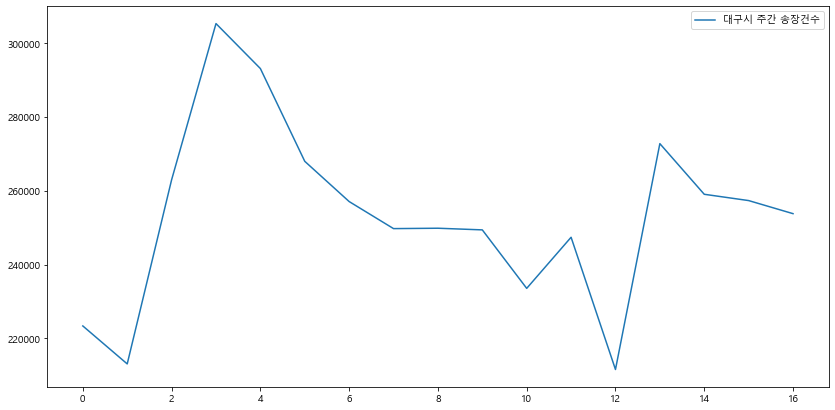

In [372]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=week_inv_daegu_20)

In [373]:
day_inv_daegu_20 = list(logistic_data_daegu['대구 일일 송장건수'].values)
day_inv_con_daegu_20 = day_inv_daegu_20[2:]

In [374]:
week_inv_daegu_20=[]
for i in range(0,int(len(day_inv_daegu_20))-7,7):
    week_inv_daegu_20.append(sum(day_inv_con_daegu_20[i:i+7]))
print('2020년 2월~5월 대구 주간 송장 건수\n', week_inv_daegu_20)

2020년 2월~5월 대구 주간 송장 건수
 [223340, 213045, 262975, 305342, 293144, 267988, 257076, 249738, 249843, 249394, 233534, 247393, 211530, 272781, 259049, 257342, 253795]


#### 대구 주간 확진자 수  
출처 : coronaboard


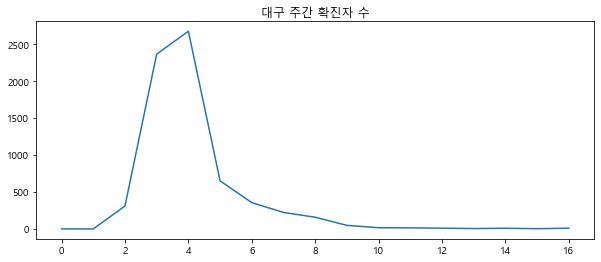

In [375]:
week_num_daegu_20 = [0,0, 310, 2366, 2676, 650, 356, 223, 158, 48, 16, 14, 10, 5, 9, 3, 10]
#2월 1,2,주차는 정보가 없어 0으로 뒀다. 이는 니중에 1,2주차를 분석에서 제외할 근거가 된다.
month_num_daegu_20=[2236,4448,199,23]
plt.title('대구 주간 확진자 수')
plt.plot(week_num_daegu_20)

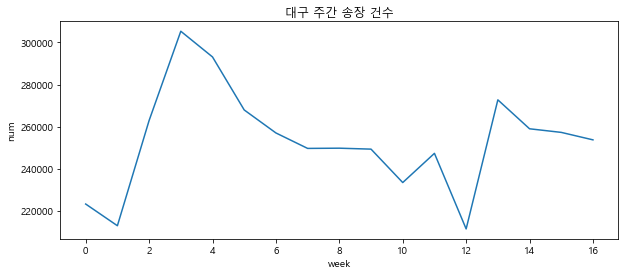

In [376]:
plt.plot(week_inv_daegu_20)
plt.title('대구 주간 송장 건수')
plt.xlabel('week')
plt.ylabel('num')
plt.show()

마찬가지로 공휴일 보정을 실시하면

In [377]:
week_inv_daegu_20_adj = []

for i in range(17):
    if i == 10:
        week_inv_daegu_20_adj.append(int(week_inv_daegu_20[i]*1.04))
    elif i == 11:
        week_inv_daegu_20_adj.append(int(week_inv_daegu_20[i]*0.96))
    elif i == 12:
        week_inv_daegu_20_adj.append(int(week_inv_daegu_20[i]*1.04))
    # 14주차(i==13)는 13주차 공휴일에 의한 영향이 14주차 어린이날에 의한 영향으로 상쇄
    elif i == 14:
        week_inv_daegu_20_adj.append(int(week_inv_daegu_20[i]*0.96))
    else:
        week_inv_daegu_20_adj.append(week_inv_daegu_20[i])
        
week_inv_daegu_20[10:], week_inv_daegu_20_adj[10:]

([233534, 247393, 211530, 272781, 259049, 257342, 253795],
 [242875, 237497, 219991, 272781, 248687, 257342, 253795])

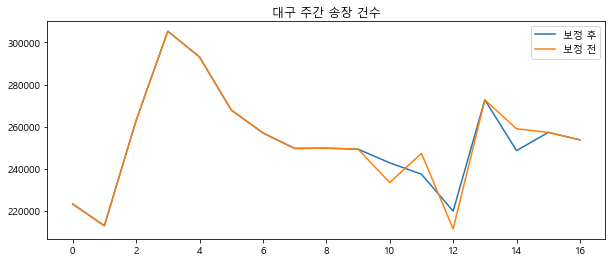

In [378]:
plt.plot(week_inv_daegu_20_adj, label='보정 후')
plt.plot(week_inv_daegu_20, label = '보정 전')
plt.title('대구 주간 송장 건수')
plt.legend()
plt.show()

#### 대구 주간 확진자 수와 송장 건수 상관계수

In [379]:
print('보정 전')
lst=[week_num_daegu_20, week_inv_daegu_20]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('보정 후')
lst=[week_num_daegu_20, week_inv_daegu_20_adj]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

보정 전
          0         1
0  1.000000  0.744404
1  0.744404  1.000000 

보정 후
          0         1
0  1.000000  0.776364
1  0.776364  1.000000


대구만의 데이터로 상관계수를 구하면 0.78이 나온다.  
이는 코로나 확산세 초반에 신천지로 인한 대구의 확진자 수 증가가 택배 수 증가로 바로 연결된 것의 영향이 크기 때문으로 보인다.  
신천지로 인한 코로나 확산으로 인해 서울의 택배도 영향을 받은 것으로 추측할 수 있지만, 이는 서울의 상관계수에 들어가지 않았다.  
서울 확진자 수 데이터로 분석을 했기 때문이다.

# 전년대비 송장 건수 증감  
- 공휴일에 의한 택배수 오차 외에도 또하나의 변인을 통제해야 한다.  
- 택배는 계절에 따른 물량의 변동 폭이 크므로 전년대비 증감을 보도록 하자

## 19년도 대구 송장 건수 불러오기

In [380]:
logistic_data_daegu_19=logistic_data[(logistic_data['CTPV_NM']=='대구광역시')&(logistic_data['DL_YMD']>=190201)&(logistic_data['DL_YMD']<=190531)]
logistic_data_daegu_19

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
6,190201,가구/인테리어,10,대구광역시,27,수성구,26,범어1동,510,6
8,190201,가구/인테리어,10,대구광역시,27,중구,11,남산4동,670,2
...,...,...,...,...,...,...,...,...,...,...
76874,190531,화장품/미용,21,대구광역시,27,중구,11,동인동,517,86
76875,190531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,184
76886,190531,화장품/미용,21,대구광역시,27,수성구,26,만촌2동,560,54
76888,190531,화장품/미용,21,대구광역시,27,수성구,26,범어2동,520,120


In [381]:
#대구 지역의 송장건수를 일별로 더해 데이터프레임 생성
logistic_data_daegu_19=logistic_data_daegu_19.groupby(['DL_YMD'], as_index=False).sum().drop(['DL_YMD', 'DL_GD_LCLS_CD', 'CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1)

date_range=pd.date_range('2020-02-01', periods=120)
logistic_data_daegu_19.set_index(date_range, inplace=True)
logistic_data_daegu_19.rename(columns={'INVC_CONT': '대구 일일 송장건수'}, inplace=True)
logistic_data_daegu_19

,대구 일일 송장건수
2020-02-01,5053
2020-02-02,687
2020-02-03,164
2020-02-04,39
2020-02-05,21
...,...
2020-05-26,52686
2020-05-27,35129
2020-05-28,31964
2020-05-29,29440


In [382]:
#대구 지역의 주간 송장건수 데이터 
week_inv_daegu_19=[]
for i in range(2,int(len(logistic_data_daegu_19)),7):
    week_inv_daegu_19.append(sum(logistic_data_daegu_19.iloc[i:i+7, 0]))

week_inv_daegu_19=pd.DataFrame(columns=['대구시 주간 송장건수'], data=week_inv_daegu_19)
week_inv_daegu_19

,대구시 주간 송장건수
0,129513
1,198832
2,180777
3,159272
4,215605
5,192897
6,184180
7,179945
8,181600
9,183976


In [383]:
week_inv_daegu_19 = list(week_inv_daegu_19['대구시 주간 송장건수'].values)

### 마찬가지로 19년도 송장 건수에 대한 공휴일 보정을 실시한다.

In [384]:
week_inv_daegu_19_adj = []

for i in range(17):
    if i == 3:
        week_inv_daegu_19_adj.append(int(week_inv_daegu_19[i]*1.15))
    elif i == 4:
        week_inv_daegu_19_adj.append(int(week_inv_daegu_19[i]*0.85))
    elif i == 13:
        week_inv_daegu_19_adj.append(int(week_inv_daegu_19[i]*1.04))
    elif i == 14:
        week_inv_daegu_19_adj.append(int(week_inv_daegu_19[i]*0.96))
    else:
        week_inv_daegu_19_adj.append(week_inv_daegu_19[i])


In [385]:
week_inv_seoul_19_array = np.array(week_inv_seoul_19)
week_inv_daegu_19_array = np.array(week_inv_daegu_19)
week_inv_seoul_19_adj_array = np.array(week_inv_seoul_19_adj)
week_inv_daegu_19_adj_array = np.array(week_inv_daegu_19_adj)
week_inv_seoul_20_array = np.array(week_inv_seoul_20)
week_inv_daegu_20_array = np.array(week_inv_daegu_20)
week_inv_seoul_20_adj_array = np.array(week_inv_seoul_20_adj)
week_inv_daegu_20_adj_array = np.array(week_inv_daegu_20_adj)

# 리스트끼리 빼면 원하는 값이 안나와 어레이로 변환

week_inv_seoul_yeardif = week_inv_seoul_20_array - week_inv_seoul_19_array
week_inv_seoul_adj_yeardif = week_inv_seoul_20_adj_array - week_inv_seoul_19_array
week_inv_daegu_yeardif = week_inv_daegu_20_array-week_inv_daegu_19_array
week_inv_daegu_ajd_yeardif = week_inv_daegu_20_adj_array - week_inv_daegu_19_array
# yeardif는 전년대비를 뜻하는 것


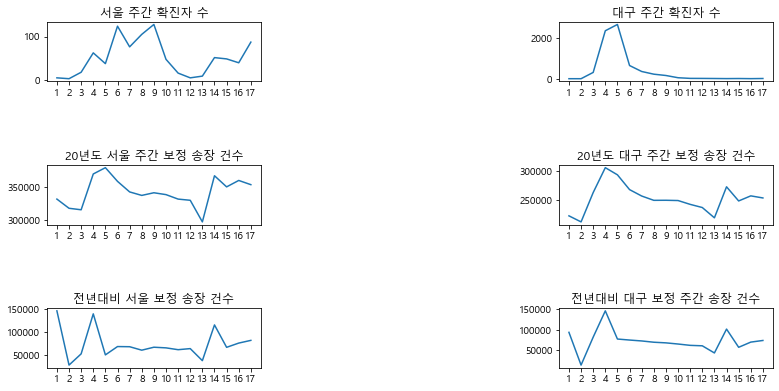

In [386]:
plt.figure(figsize=(13, 9))

plt.subplot(731)
plt.title('서울 주간 확진자 수')
plt.plot(week_17, week_num_seoul_20)

plt.subplot(733)
plt.title('대구 주간 확진자 수')
plt.plot(week_17, week_num_daegu_20)

plt.subplot(7,3,7)
plt.title('20년도 서울 주간 보정 송장 건수')
plt.plot(week_17, week_inv_seoul_20_adj)

plt.subplot(7,3,9)
plt.title('20년도 대구 주간 보정 송장 건수')
plt.plot(week_17, week_inv_daegu_20_adj)

plt.subplot(7,3,13)
plt.title('전년대비 서울 보정 송장 건수')
plt.plot(week_17, week_inv_seoul_adj_yeardif)

plt.subplot(7,3,15)
plt.title('전년대비 대구 보정 주간 송장 건수')
plt.plot(week_17, week_inv_daegu_ajd_yeardif)

## 2월 1주차, 2주차는 분석에서 제외 할 것이다 
### 근거
- 코로나의 영향이 미미했다 (2주차 까지의 확진자 수 전부 합쳐도 전국 29명이고 본격 확산세는 3주차부터 시작)  
- 19년도 2월 1주차에 택배 물량의 변동이 큰 설날이 있었기 때문이다. (20년에는 설날이 1월에 있었다.)

In [387]:
week_num_seoul_20_from_3week = week_num_seoul_20[2:]
week_num_daegu_20_from_3week = week_num_daegu_20[2:]
week_inv_seoul_20_from_3week = week_inv_seoul_20[2:]
week_inv_daegu_20_from_3week = week_inv_daegu_20[2:]
week_inv_seoul_20_adj_from_3week = week_inv_seoul_20_adj[2:]
week_inv_seoul_19_adj_from_3week = week_inv_seoul_19_adj[2:]
week_inv_daegu_20_adj_from_3week = week_inv_daegu_20_adj[2:]
week_inv_daegu_19_adj_from_3week = week_inv_daegu_19_adj[2:]
week_inv_seoul_19_from_3week = week_inv_seoul_19[2:]
week_inv_daegu_19_from_3week = week_inv_daegu_19[2:]
week_inv_seoul_yeardif_from_3week = week_inv_seoul_yeardif[2:]
week_inv_daegu_yeardif_from_3week = week_inv_daegu_yeardif[2:]
week_inv_seoul_adj_yeardif_from_3week = week_inv_seoul_adj_yeardif[2:]
week_inv_daegu_adj_yeardif_from_3week = week_inv_daegu_ajd_yeardif[2:]

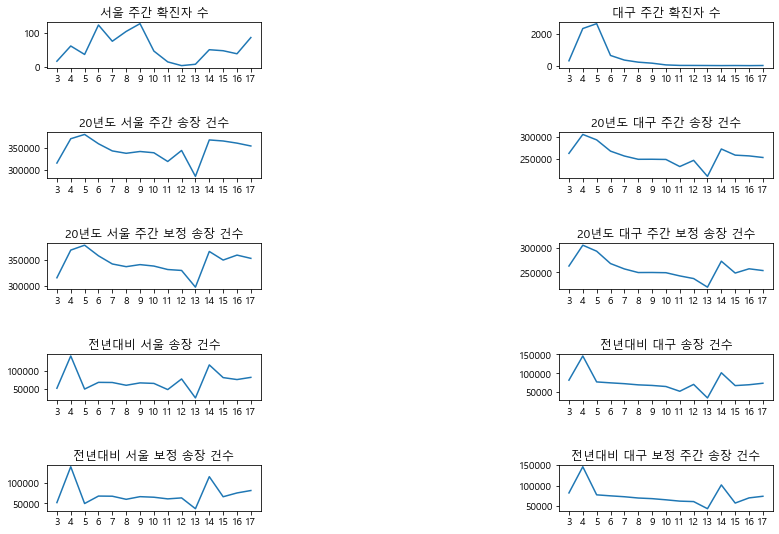

In [388]:
plt.figure(figsize=(13, 9))

plt.subplot(9,3,1)
plt.title('서울 주간 확진자 수')
plt.plot(week_from_3week, week_num_seoul_20_from_3week)

plt.subplot(9,3,3)
plt.title('대구 주간 확진자 수')
plt.plot(week_from_3week, week_num_daegu_20_from_3week)

plt.subplot(9,3,7)
plt.title('20년도 서울 주간 송장 건수')
plt.plot(week_from_3week, week_inv_seoul_20_from_3week)

plt.subplot(9,3,9)
plt.title('20년도 대구 주간 송장 건수')
plt.plot(week_from_3week, week_inv_daegu_20_from_3week)

plt.subplot(9,3,13)
plt.title('20년도 서울 주간 보정 송장 건수')
plt.plot(week_from_3week, week_inv_seoul_20_adj_from_3week)

plt.subplot(9,3,15)
plt.title('20년도 대구 주간 보정 송장 건수')
plt.plot(week_from_3week, week_inv_daegu_20_adj_from_3week)

plt.subplot(9,3,19)
plt.title('전년대비 서울 송장 건수')
plt.plot(week_from_3week, week_inv_seoul_yeardif_from_3week)

plt.subplot(9,3,21)
plt.title('전년대비 대구 송장 건수')
plt.plot(week_from_3week, week_inv_daegu_yeardif_from_3week)

plt.subplot(9,3,25)
plt.title('전년대비 서울 보정 송장 건수')
plt.plot(week_from_3week, week_inv_seoul_adj_yeardif_from_3week)

plt.subplot(9,3,27)
plt.title('전년대비 대구 보정 주간 송장 건수')
plt.plot(week_from_3week, week_inv_daegu_adj_yeardif_from_3week)

맨 마지막줄의 그래프인 '전년대비' '(공휴일)보정' 그래프를 보면 4주차, 14주차에 송장건수가 급증한다.  
이는 사람들이 기존에 없던 확산세에 대해 두려움을 느껴 외출을 꺼리면서 택배를 주문하는 반응속도가 매우 빠르단 것을 알 수 있다.  
또한 바로 다음 주에는 택배량이 안정세를 갖는 특징을 보인다. 이는 물건을 살 사람은 이미 빠르게 다 샀기 때문인 것 같다. 

또한 전년대비 보정 송장 건수 그래프를 보면 3~11주차(신천지 영향)는 대구의 확산세와 비슷한 양상이고,  
12주차부터(14주차에 이태원클럽)는 서울의 확산세와 비슷한 양상을 띤다.  
#### 국민들은 속한 지역의 확산세보다는 전국적인 이슈에 민감하게 반응함을 알 수 있다.

또한 14주차 폭증한 택배량에 비해 이태원으로 인한 확진자 수는 신천지 때와 비교했을 때 굉장히 적다.   
#### 이는 사람들이 이미 코로나 확산세를 겪어본 학습효과에 의한 것으로 보인다.  
따라서 다시한번 확산세가 시작된다면 택배량이 금방 폭증했다가 안정세를 찾을 것으로 예상된다.

In [389]:
print('서울 주간 확진자 수 - 서울 주간 송장 건수 상관계수')
lst=[week_num_seoul_20_from_3week, week_inv_seoul_20_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('서울 주간 확진자 수 - 서울 주간 보정 송장 건수 상관계수')
lst = [week_num_seoul_20_from_3week, week_inv_seoul_20_adj_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('서울 주간 확진자 수 - 전년대비 서울 주간 송장 건수 상관계수')
lst = [week_num_seoul_20_from_3week, week_inv_seoul_yeardif_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('서울 주간 확진자 수 - 전년대비 서울 주간 보정 송장 건수 상관계수')
lst = [week_num_seoul_20_from_3week, week_inv_seoul_adj_yeardif_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('서울 주간 확진자 수 - 전년대비 서울 주간 보정 송장 건수 상관계수 최대치 - 11주차~17주차')
lst = [week_num_seoul_20_from_3week[8:], week_inv_seoul_adj_yeardif_from_3week[8:]]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

서울 주간 확진자 수 - 서울 주간 송장 건수 상관계수
          0         1
0  1.000000  0.339499
1  0.339499  1.000000 

서울 주간 확진자 수 - 서울 주간 보정 송장 건수 상관계수
          0         1
0  1.000000  0.365456
1  0.365456  1.000000 

서울 주간 확진자 수 - 전년대비 서울 주간 송장 건수 상관계수
          0         1
0  1.000000  0.207488
1  0.207488  1.000000 

서울 주간 확진자 수 - 전년대비 서울 주간 보정 송장 건수 상관계수
          0         1
0  1.000000  0.206032
1  0.206032  1.000000 

서울 주간 확진자 수 - 전년대비 서울 주간 보정 송장 건수 상관계수 최대치 - 11주차~17주차
          0         1
0  1.000000  0.604339
1  0.604339  1.000000 



공휴일 보정을 실시했을 때 상관계수가 올라간다  
상관계수가 크게 높지 않은 이유는, 택배는 전국의 코로나 확산세에 영향을 받지만 여기에는 서울의 코로나 확진자만으로 분석을 했기 때문이다. 
  
서울의 이태원 클럽 감염으로인해 전국이 떠들썩 했던 14주차를 포함해 11주차~17주차의 상관계수를 도출하면 0.52가 나온다

In [390]:
print('대구 주간 확진자 수 - 대구 주간 송장 건수 상관계수')
lst=[week_num_daegu_20_from_3week, week_inv_daegu_20_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('대구 주간 확진자 수 - 대구 주간 보정 송장 건수 상관계수')
lst = [week_num_daegu_20_from_3week, week_inv_daegu_20_adj_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('대구 주간 확진자 수 - 전년대비 대구 주간 송장 건수 상관계수')
lst = [week_num_daegu_20_from_3week, week_inv_daegu_yeardif_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('대구 주간 확진자 수 - 전년대비 대구 주간 보정 송장 건수 상관계수')
lst = [week_num_daegu_20_from_3week, week_inv_daegu_adj_yeardif_from_3week]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('대구 주간 확진자 수 - 대구 주간 보정 송장 건수 상관계수 최대치 - 3주차~10주차')
lst = [week_num_daegu_20_from_3week[:9], week_inv_daegu_20_adj_from_3week[:9]]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

print('대구 주간 확진자 수 - 전년대비 대구 주간 보정 송장 건수 상관계수 최대치 - 3주차~12주차')
lst = [week_num_daegu_20_from_3week[:11], week_inv_daegu_adj_yeardif_from_3week[:11]]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr,'\n')

대구 주간 확진자 수 - 대구 주간 송장 건수 상관계수
          0         1
0  1.000000  0.780376
1  0.780376  1.000000 

대구 주간 확진자 수 - 대구 주간 보정 송장 건수 상관계수
          0         1
0  1.000000  0.826973
1  0.826973  1.000000 

대구 주간 확진자 수 - 전년대비 대구 주간 송장 건수 상관계수
         0        1
0  1.00000  0.58764
1  0.58764  1.00000 

대구 주간 확진자 수 - 전년대비 대구 주간 보정 송장 건수 상관계수
          0         1
0  1.000000  0.610253
1  0.610253  1.000000 

대구 주간 확진자 수 - 대구 주간 보정 송장 건수 상관계수 최대치 - 3주차~10주차
          0         1
0  1.000000  0.954563
1  0.954563  1.000000 

대구 주간 확진자 수 - 전년대비 대구 주간 보정 송장 건수 상관계수 최대치 - 3주차~12주차
          0         1
0  1.000000  0.701851
1  0.701851  1.000000 



코로나 초기에 대구의 신천지 집단감염으로 인한 확산세가 전국의 확산세를 주도했기 때문에 대구의 상관계수는 높게 나온다.  



송장건수 변화 비율에 비해 확진자 수의 변화 비율의 변동이 너무 커서 확산세에 따른 택배량을 수식적인 모델링을 하지는 못했지만,  
대략적으로 어떠한 양상을 띠는 지는 위의 그래프 형상에서 설명했듯이 여러가지 시사점을 도출할 수 있었다.

# 2. 송장 건수와 매출액의 상관도 분석    


물동량과 매출액의 상관계수 분석  
- 2012년 ~ 2019년의 물동량과 매출액 데이터 활용  
출처 : 국가물류통합정보센터

In [391]:
box_data = pd.read_excel('./01_parcelServiceLogistics.xlsx')
box_datas = box_data[3:12]
box = box_datas['Unnamed: 7']
boxes_12_19 = list(box)[1:]
print('2012년~2019년의 물동량\n', boxes_12_19)

2012년~2019년의 물동량
 [140598, 150931, 162325, 181596, 204666, 231946, 254278, 278980]


In [392]:
sales_data = pd.read_excel('./02_parcelServiceSales.xlsx')
sales_datas = sales_data[3:12]
sale = sales_datas['Unnamed: 7']
sales_12_19 = list(sale)[1:]
print('2012년~2019년의  매출액\n', sales_12_19)


2012년~2019년의  매출액
 [35232, 37348, 39756, 43437, 47444, 52145, 56673, 63303]


In [393]:
lst = [boxes_12_19, sales_12_19]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

          0         1
0  1.000000  0.998001
1  0.998001  1.000000


### 물동량과 매출액의 상관계수가 1에 가깝게 나온다.  
### 송장 건수를 물동량이라고 본다면, 송장 건수의 증가는 매출액의 증가로 이어진다고 볼 수 있다.

# 3. 택배회사의 매출과 인력수요의 상관도 분석
2012~2018의 택배회사 매출액 데이터, 종사자 수 데이터를 통해
매출에 따룬 인력수요 예측 모델 만들기

f(매출액)=종사자 수


In [394]:
print('2012~2018 택배업 매출액(억원)\n', sales_12_19[:7])
par_sales_year = sales_12_19[:7]

2012~2018 택배업 매출액(억원)
 [35232, 37348, 39756, 43437, 47444, 52145, 56673]


In [395]:
par_num = pd.read_csv('./택배업 종사자 수.csv', sep=',',thousands=',', header=None)
par_num
#출처 : 국가물류통합정보센터

,0,1,2,3,4,5,6,7,8,9,10
0,산업별,종사자규모별,종사상지위별,성별,2018,2017,2016,2015,2014,2013,2012
1,택배업,합계,합계,계,41376,38408,35708,34248,33071,30910,28743
2,택배업,합계,합계,남자,39603,36910,34814,33163,32027,29701,27364
3,택배업,합계,합계,여자,1773,1498,894,1085,1044,1209,1379
4,택배업,합계,피고용자,계,41376,38408,35708,34055,33071,30910,28743
...,...,...,...,...,...,...,...,...,...,...,...
164,택배업,500명 이상,무급가족종사자,남자,-,NaN,NaN,-,-,-,-
165,택배업,500명 이상,무급가족종사자,여자,-,NaN,NaN,-,-,-,-
166,택배업,500명 이상,기타종사자,계,-,NaN,NaN,22,-,-,-
167,택배업,500명 이상,기타종사자,남자,-,NaN,NaN,22,-,-,-


In [396]:
par_num_years=par_num.iloc[1,4:11]
par_num_year = []
for i in range(7):
    par_num_year.append(int(par_num_years[10-i]))
print('2012~2018 택배업 종사자 수\n', par_num_year)

2012~2018 택배업 종사자 수
 [28743, 30910, 33071, 34248, 35708, 38408, 41376]


#### 매출액(x축)에 따른 종사자 수(y축)

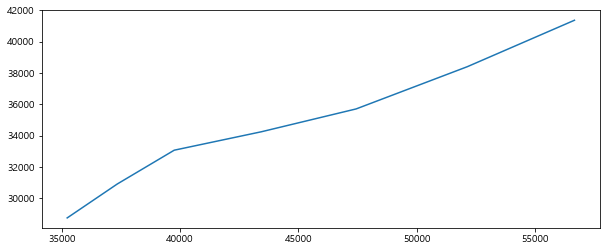

In [397]:
plt.plot(par_sales_year, par_num_year)

#### predict 활용해 매출액을 통해 종사자 수 예측  
그래프 모형에 따라 선형회귀가 최선임을 알 수 있다.

In [398]:
print('2012~2018 택배업 매출액(억원)\n', par_sales_year)
print('2012~2018 택배업 종사자 수\n', par_num_year)

line_fitter3 = LinearRegression()
x3=pd.DataFrame(par_sales_year)
y3=pd.DataFrame(par_num_year)
line_fitter3.fit(x3,y3)

#바로 밑의 주석은 run all하면 input값 입력하는 거 걸려서 임시로 주석처리 한 것
'''
sales=int(input('매출액(억원) : '))
predict_sales = line_fitter3.predict([[sales]])

print('매출액이  %d억원이라면 종사자 수는 %d명이다'%(sales, predict_sales))
'''

2012~2018 택배업 매출액(억원)
 [35232, 37348, 39756, 43437, 47444, 52145, 56673]
2012~2018 택배업 종사자 수
 [28743, 30910, 33071, 34248, 35708, 38408, 41376]


"\nsales=int(input('매출액(억원) : '))\npredict_sales = line_fitter3.predict([[sales]])\n\nprint('매출액이  %d억원이라면 종사자 수는 %d명이다'%(sales, predict_sales))\n"

fit과 predict를 통해 매출액을 통해 종사자 수를 예측할 수 있다.

## 따라서 송장 건수가 늘면 매출액이 늘고, 필요 인력이 늘 것임을 알 수 있다.